#### Para fins didáticos, resolvi criar um teste de sentimentos utilizando a base de Reviews em cima do Jogo Streets of Rage 4/Bare Knuckle IV, já aproveitando que ele foi tema para meus estudos de <i>WebScraping</i> com <i>BeautifulSoup</i> e <i>Selenium</i>. Dou créditos ao alegeorgelustosa com sua postagem no medium <a href='https://medium.com/@alegeorgelustosa/an%C3%A1lise-de-sentimentos-e-introdu%C3%A7%C3%A3o-a-nlp-com-python-amazon-yelp-imdb-28a8a66d78cf'>clique aqui</a> referente à análise de Sentimentos com Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
metacritic_base = pd.read_excel('SOR4_Reviews_PTBR_MetaCritic.xlsx')
steam_base = pd.read_excel('SOR4_Reviews_Steam.xlsx')

In [2]:
metacritic_base.head()

,Unnamed: 0,Unnamed: 0.1,Review,Nota,Data,Plataforma,Status
0,1,1,"o melhor streets of rage de todos os tempos, g...",10,"Apr 30, 2020",playstation-4,Boa
1,3,3,streets of rage 4 é a evolução da trilogia do ...,10,"Apr 30, 2020",playstation-4,Boa
2,27,27,os gráficos estão muito bonitos e o jogo é ex...,10,"May 1, 2020",playstation-4,Boa
3,46,46,"o melhor streets of rage de todos os tempos, g...",10,"Apr 30, 2020",xbox-one,Boa
4,63,63,"um dos melhores beat em up já feitos, o sistem...",10,"Apr 30, 2020",switch,Boa


In [3]:
steam_base.head()

,Unnamed: 0,review,voted_up
0,69585626,vou começar pelos contras.a única coisa coisa ...,True
1,69577185,melhor jogo,True
2,69517744,"senti aquela ponta de nostalgia! muito bom, me...",True
3,69515235,muito bom!!,True
4,69514281,muito bom para galera old school,True


In [4]:
metacritic_base['voted_up'] = metacritic_base.Nota > 6
metacritic_base['Fonte'] = 'MetaCritic'
steam_base['Review'] = steam_base.review
steam_base['Fonte'] = 'Steam'

In [5]:
merged_base = pd.concat([metacritic_base, steam_base],
                        axis=0,
                        sort=False)[['Review', 'voted_up', 'Fonte']]
del steam_base, metacritic_base

### WordCloud

In [6]:
merged_base.Review = merged_base.Review.astype(str)

##### Criando o conjunto de palavras das reviews, desconsiderando a stopword delas

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

stopwordsNltk = stopwords.words('portuguese')
words = []

for i in merged_base.Review:
    for p in i.split():
        if p not in stopwordsNltk:
            words.append(p)
words = str(words)

##### Criando a variável e Imagem do WordCloud

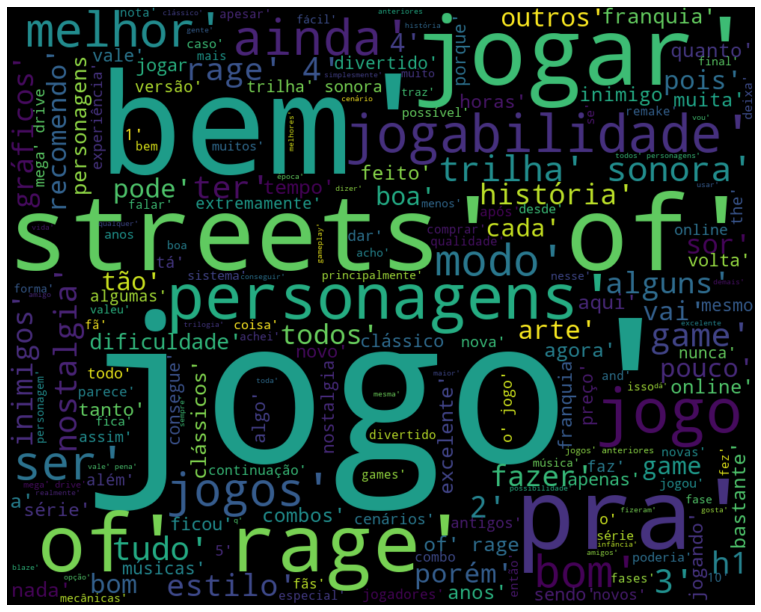

In [8]:
wordcloud = WordCloud(width=1000, height=800, margin=0).generate(words)
plt.figure(figsize=(20, 11))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)

##### Criando uma nova coluna que recebe o tamanho de caracteres das Reviews

In [9]:
merged_base['Tamanho_Review'] = merged_base.Review.apply(len)
x1 = list(merged_base.loc[merged_base.Fonte == 'Steam']['Tamanho_Review'])
x2 = list(merged_base.loc[merged_base.Fonte == 'MetaCritic']['Tamanho_Review'])

##### Criando o Histograma

c:\users\allan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


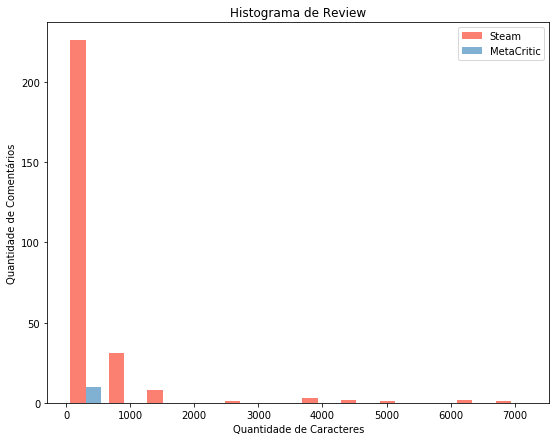

In [11]:
colors = ['#fb8072', '#80b1d3']
labels = ['Steam', 'MetaCritic']
plt.figure(figsize=(9, 7))
plt.hist([x1, x2], bins = 180//15, normed=False, color=colors, label=labels)
plt.ylabel('Quantidade de Comentários')
plt.xlabel('Quantidade de Caracteres')
plt.title('Histograma de Review')
plt.legend()

#### É bem visível que as Reviews da Steam são bem mais extensas com o histograma acima, agora, vamos plotar a correlação entre comprimento da review e se a review é negativa ou positiva

Text(0.5, 0, 'Sentimento do Comentário')

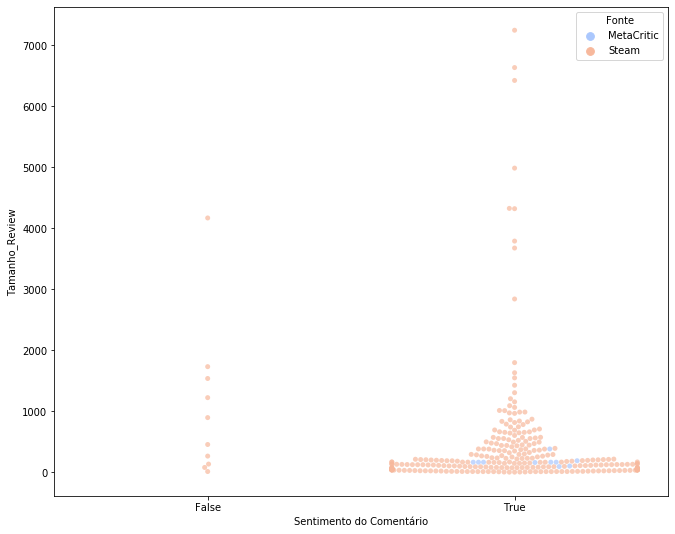

In [12]:
import seaborn as sns
plt.figure(figsize=(11, 9))
sns.swarmplot(x="voted_up", y="Tamanho_Review", data=merged_base, hue="Fonte", alpha=0.7, palette='coolwarm')
plt.xlabel('Sentimento do Comentário')

### Pelo Swarmplot, podemos ver que há relação entre o tamanho da Review e se ele é positivo ou negativo.
#### Tenha em mente de baixar a biblioteca do Spacy com o seguinte comando: 
##### python -m spacy download pt_core_news_sm

In [13]:
review_negativa = merged_base.loc[~merged_base.voted_up]['Review'].head(15).values[3]
review_positiva = merged_base.loc[merged_base.voted_up]['Review'].head(15).values[14]

In [14]:
import spacy
nlp = spacy.load('pt_core_news_sm')

In [15]:
doc = nlp(review_negativa)
for token in doc:
    print(f'{token.text:{10}} {token.pos_:{10}} {token.tag_:{5}} {spacy.explain(token.tag_)}')

o          DET        <artd>|ART|M|S|@>N None
jogo       NOUN       <np-def>|N|M|S|@SUBJ> None
ficou      VERB       <first-cjt>|<mv>|V|PS|3S|IND|@FS-STA None
decente    ADV        ADV|@<ADVL None
mas        CCONJ      <co-fcl>|<co-fmc>|<co-vfin>|KC|@CO None
poderia    AUX        <aux>|V|COND|3S|@FS-N< None
ser        VERB       <mv>|V|INF|@ICL-AUX< None
bem        ADV        <quant>|ADV|@>A None
melhor     ADJ        <KOMP>|<COMP>|ADJ|M|S|@<SC None
,          PUNCT      PU|@PU None
os         DET        <artd>|ART|M|P|@>N None
golpes     SYM        <np-def>|N|M|P|@SUBJ> None
invencíveis ADJ        ADJ|M|P|@N< None
são        VERB       <mv>|V|PR|3P|IND|@FS-STA None
um         DET        <arti>|ART|M|S|@>N None
lixo       NOUN       <np-idf>|N|M|S|@<SC None
e          CCONJ      <co-acc>|KC|@CO None
a          DET        <artd>|ART|F|S|@>N None
dificuldade NOUN       <np-def>|N|F|S|@SUBJ> None
é          VERB       <mv>|V|PR|3S|IND|@FS-STA None
bem        ADV        <quant>|ADV|@ADVL> 

In [16]:
from spacy import displacy
displacy.render(doc, style='dep', jupyter=True, options={'distance': 120})

### NLTK

In [17]:
print(f'Formato do DataFrame de reviews: {merged_base.shape}')

Formato do DataFrame de reviews: (285, 4)


In [18]:
merged_base = merged_base[['Review', 'voted_up']]
merged_base = merged_base.reset_index()
del merged_base['index']

In [19]:
# Aplicando REGEX para remoção de numéricos e caracteres especiais
merged_base['Review'] = merged_base['Review'].str.replace('[^\w\s]', '')

##### Dividindo o DataFrame merged_base em uma base de treinamento e teste

In [20]:
from sklearn.model_selection import train_test_split
treino, teste = train_test_split(merged_base, test_size=0.2)

In [ ]:
treino.head(5)

In [ ]:
teste.head(5)

In [21]:
print(f'Shape dos dados de Treino {treino.shape}')
treino.voted_up.value_counts(normalize=True)
print(f'Shape dos dados de Teste {teste.shape}')
teste.voted_up.value_counts(normalize=True)

Shape dos dados de Treino (228, 2)
Shape dos dados de Teste (57, 2)


True     0.964912
False    0.035088
Name: voted_up, dtype: float64

##### Pelo jeito, o dataSet não está balanceado, muitas reviews em PT-BR são positivas.<br>
### Stemming de Textos
##### Partindo para o Stemming do texto que consiste em realizar um pré-processamento transformando as variantes de uma palavra (como caminhar -> andar) pois possuem o mesmo significado ou transformar uma palavra plural no singular (maçãs -> maçã)

In [22]:
def aplica_Stemmer(texto):
    stemmer = nltk.stem.SnowballStemmer('portuguese')
    reviews_sem_stem = []
    for (palavras, sentimento) in texto:
        com_stem = [str(stemmer.stem(p)) for p in palavras.lower().split() if p not in stopwordsNltk]
        reviews_sem_stem.append((com_stem, sentimento))
    return reviews_sem_stem

In [23]:
import nltk
treino = [tuple(x) for x in treino.values]

In [24]:
frases_com_stem_treinamento = aplica_Stemmer(treino)

## Resultado do Stemming na base de treino

In [25]:
pd.DataFrame(frases_com_stem_treinamento, columns=['Review', 'vote_up']).sample(10)

,Review,vote_up
92,[maravilh],True
64,"[eit, vam, lao, diz, dess, jog, simples, incrí...",True
170,[car],False
138,"[carai, jogam, 4, ma, ra, vi, lho, so]",True
217,"[jogac, jogabil, extrem, flu, boa, respost, ar...",True
84,"[bom, jogobast, divert, traz, mecan, diferent,...",True
141,"[escrev, fal, streets, of, rag, fal, comec, am...",True
100,"[acert, ped, yuz, koshir, fiz, algum, music, j...",True
83,"[dev, nad, anterior, viv, époc, our, beat, ups...",True
189,"[ame, tod, aspect, 20, tant, anos, esper, gam,...",True


##### Agora, realizando o Stemming na base de Teste

In [26]:
teste = [tuple(x) for x in teste.values]
frases_com_stem_teste = aplica_Stemmer(treino)
pd.DataFrame(frases_com_stem_teste, columns=['Review', 'vote_up']).sample(10)

,Review,vote_up
170,[car],False
117,"[fiel, jogabil, sor, clássic, algum, mecân, mo...",True
62,"[jog, legal, alguns, problem, 1, enquant, ar, ...",True
155,"[good, graphics, good, soundtrack, multiplay, ...",True
78,"[nostalg, car, vai, fé, q, jog, ta, fil]",True
133,[nan],True
160,"[palavr, gamefod, maisun, cois, chat, mantiv, ...",True
120,"[obrigatóri, qualqu, gam, gost, beat, n, up, ó...",True
52,"[gam, espetacular, sent, jog, streets, of, rag...",True
107,"[sensacional, atualiz, clássic, agrad, retroga...",True


In [27]:
def busca_palavras(reviews):
    todas_palavras = []
    for (palavras, sentimento) in reviews:
        todas_palavras.extend(palavras)
    return todas_palavras

In [28]:
palavras_treinamento = busca_palavras(frases_com_stem_treinamento)
palavras_teste = busca_palavras(frases_com_stem_teste)

In [29]:
print(f'Quantidade de Palavras na base de treinamento: {pd.DataFrame(palavras_treinamento).count()}')
print(f'Quantidade de Palavras na base de teste: {pd.DataFrame(palavras_teste).count()}')

Quantidade de Palavras na base de treinamento: 0    10726
dtype: int64
Quantidade de Palavras na base de teste: 0    10726
dtype: int64


In [30]:
def busca_frequencia(palavras):
    palavras = nltk.FreqDist(palavras)
    return palavras

In [31]:
frequencia_treinamento = busca_frequencia(palavras_treinamento)

#### Com a ajuda da função FreqDist do NLTK, podemos listar as 10 palavras mais populares na base de Treino

In [32]:
frequencia_treinamento.most_common(10)

[('jog', 522),
 ('bem', 104),
 ('personagens', 98),
 ('of', 97),
 ('rag', 86),
 ('streets', 80),
 ('pod', 71),
 ('pra', 69),
 ('tod', 66),
 ('nov', 65)]

##### Agora para a base de teste

In [33]:
frequencia_teste = busca_frequencia(palavras_teste)

In [34]:
frequencia_teste.most_common(10)

[('jog', 522),
 ('bem', 104),
 ('personagens', 98),
 ('of', 97),
 ('rag', 86),
 ('streets', 80),
 ('pod', 71),
 ('pra', 69),
 ('tod', 66),
 ('nov', 65)]

### Plotando a frequência das palavras

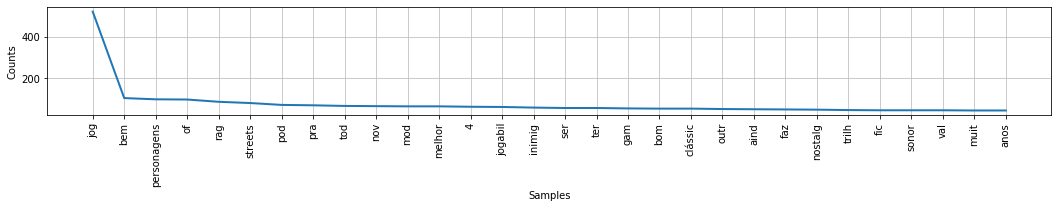

In [35]:
plt.figure(figsize=(18, 2))
frequencia_treinamento.plot(30, cumulative=False)

##### Filtrando as palavras unicas

In [40]:
def busca_palavras_unicas(frequencia):
    freq = frequencia.keys()
    return freq

palavras_unicas_treinamento = busca_palavras_unicas(frequencia_treinamento)
palavras_unicas_teste = busca_palavras_unicas(frequencia_teste)

In [48]:
def extrator_palavras_treino(dict):
    doc = set(dict)
    caracteristicas = {}
    for palavra in palavras_unicas_treinamento:
        caracteristicas['%s' % palavra] = (palavra in doc)
    return caracteristicas

def extrator_palavras_teste(dict):
    doc = set(dict)
    caracteristicas = {}
    for palavra in palavras_unicas_teste:
        caracteristicas['%s' % palavra] = (palavra in doc)
    return caracteristicas

In [49]:
base_completa_treinamento = nltk.classify.apply_features(extrator_palavras_treino, frases_com_stem_treinamento)
base_completa_teste = nltk.classify.apply_features(extrator_palavras_teste, frases_com_stem_teste)

##### Classificador

In [50]:
classificador = nltk.NaiveBayesClassifier.train(base_completa_treinamento)

In [52]:
print(classificador.labels())

[True, False]


In [53]:
print(nltk.classify.accuracy(classificador, base_completa_teste))

0.9342105263157895


##### Acurácia de 93%, obviamente devo mexer na base de dados, pois muita Review é positiva...